<a href="https://colab.research.google.com/github/ripnic/comp-ling-coursework-assignment/blob/main/code%20from%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

--2025-01-16 00:36:05--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22322605 (21M) [text/plain]
Saving to: ‘Compiled_Reviews.txt.2’

Compiled_Reviews.tx 100%[===================>]  21.29M  --.-KB/s    in 0.1s    

2025-01-16 00:36:05 (206 MB/s) - ‘Compiled_Reviews.txt.2’ saved [22322605/22322605]



In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

with open("Compiled_Reviews.txt") as f:
   for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        product_types.append(fields[2])
        helpfulness_ratings.append(fields[3])


In [48]:
#data preprocessing

import re
#tokenising the text, turning a list of strings into a list of lists of tokens, tokenising by punctuation n space
tokenized_text = [re.findall("[^ !%&'()*,-./\:;?@[\]_{}#¡§«¶·»¿‘’“”\"\"]+",txt) for txt in reviews]
#stopwords dervied from NLTK
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'}

tokens=[]
for s in tokenized_text:
      tokens.extend(s)
#removing stopwords and accounting for case distinction too
tokens = [token for token in tokens if token.lower() not in stop_words]

from collections import Counter
counts=Counter(tokens)
#most frequent first
so=sorted(counts.items(), key=lambda item: item[1], reverse=True)
so=list(zip(*so))[0]
#5000 most frequent words
type_list=so[0:5000]

In [50]:
#one-hot encoding
#making an empty 36547 x 5000 matrix of zeros - we have 36547 reviews
M = np.zeros((len(reviews), len(type_list)))  #no of rows is no of reviews and no of columns is no of words in type list
#iterate over the reviews
for i, rev in enumerate(reviews):
    # Tokenise the current review:
    tokens = re.findall("[^ !%&'()*,-./\:;?@[\]_{}#¡§«¶·»¿‘’“”\"\"]+",rev)
    # iterate over the words in our type list (the set of 5000 words):
    for j,t in enumerate(type_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if t in tokens:
              M[i,j] = 1

In [54]:
#splitting our data into training 80% , development 10% , and test 10%
train_ints=np.random.choice(len(reviews),int(len(reviews)*0.8),replace=False)
remaining_ints=list(set(range(0,len(reviews))) - set(train_ints))
test_ints=np.random.choice(len(remaining_ints),int(len(remaining_ints)*0.5),replace=False)
dev_ints=list(set(range(0,len(remaining_ints))) - set(test_ints))

In [55]:
#one-hot encoded input matrices for training, development and test

M_train = np.array(M[train_ints,]).T
M_test = np.array(M[test_ints,]).T
M_dev = np.array(M[dev_ints,]).T

unique_helpfulness=list(set(helpfulness_ratings))
unique_one_hot=np.diag(np.ones(len(unique_helpfulness)))

helpfulness_train = [helpfulness_ratings[i] for i in train_ints]
helpfulness_test = [helpfulness_ratings[i] for i in test_ints]
helpfulness_dev = [helpfulness_ratings[i] for i in dev_ints]

In [56]:
#one-hot encoded target output matrices for training, development and test
y_train=np.array([list(unique_one_hot[k]) for k in [unique_helpfulness.index(x) for x in helpfulness_train]]).T
y_test=np.array([list(unique_one_hot[k]) for k in [unique_helpfulness.index(x) for x in helpfulness_test]]).T
y_dev=np.array([list(unique_one_hot[k]) for k in [unique_helpfulness.index(x) for x in helpfulness_dev]]).T

In [57]:
#transposing matrix
M_train=M_train.T
M_test=M_test.T
M_dev=M_dev.T
y_train=y_train.T
y_test=y_test.T
y_dev=y_dev.T

In [58]:
M_train.shape

(29238, 5000)

In [59]:
M_train=M_train.T

In [60]:
M_train.shape[1] #29238

29238

In [61]:
M_train.shape[0] #5000

5000

In [62]:
len(y_train)

29238

Text(0, 0.5, 'loss')

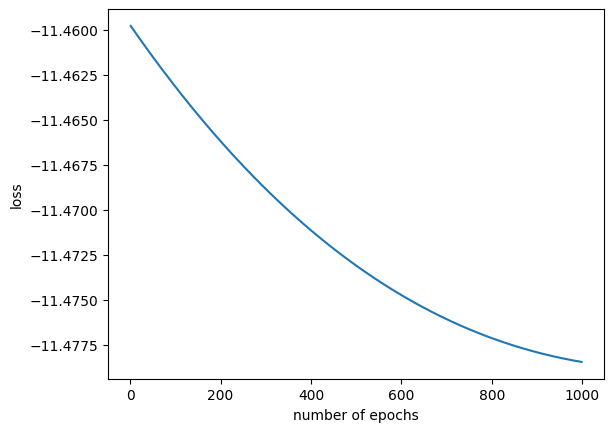

In [63]:
#building logistic regression model
np.random.seed(10)
n_iters = 1000
num_features = 5000
num_classes = 3 #3 different helpfulness ratings
num_samples = len(y_train)
weights = np.random.rand(num_features,num_classes)
bias = np.zeros(num_classes)
lr = 0.0005
logistic_loss = []

z=np.zeros((num_samples,num_classes))
q=np.zeros((num_samples,num_classes))

for i in range(n_iters):

    z = M_train.T.dot(weights)+bias
    z_sum = np.exp(z).sum(axis=1)
    q = np.array([list(np.exp(z_i)/z_sum[i]) for i, z_i in enumerate(z)])

    loss = np.mean(-np.log2((np.sum((y_train.T*q.T),axis=1))))
    logistic_loss.append(loss)

    dw = M_train.dot((q-y_train))/num_samples
    db = np.sum(q - y_train, axis=0)/num_samples

    weights = (weights - (dw*lr))
    bias = bias - (db * lr)

plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [64]:
#batch training
k = 6
# Create array of all indices in training data
a=np.arange(y_train.T.shape[1])
print(a)
# randomly shuffle indices in place (in case of classes being unequally distributed across positions in data)
np.random.shuffle(a)
# Split indices into k equal batches
batches=np.array(np.split(a, k))

[    0     1     2 ... 29235 29236 29237]


In [65]:
#double checking
batches.shape

(6, 4873)

Text(0, 0.5, 'loss')

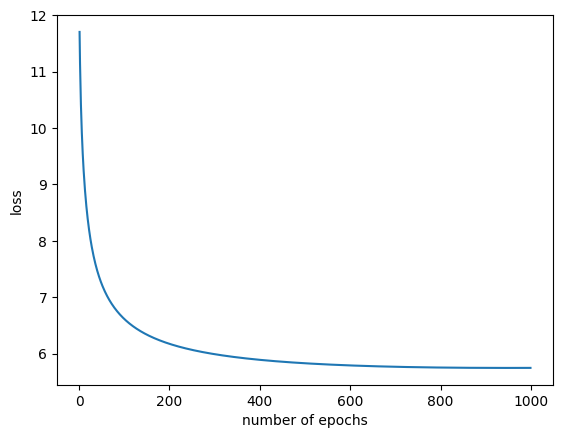

In [66]:
#batch training
np.random.seed(10)
n_iters = 1000
num_features = 5000
num_classes = 3 #3 different helpfulness ratings
num_samples = len(y_train)
weights = np.random.rand(num_features,num_classes)
bias=np.zeros(num_classes)
lr=0.0005
logistic_loss=[]

z=np.zeros((num_samples,num_classes))
q=np.zeros((num_samples,num_classes))

for i in range(n_iters):
    loss=0.0
    for j in range(len(batches)):
      this_batch_M_train = M_train[:, batches[j]]
      this_batch_y_train = y_train[batches[j]]

      z= this_batch_M_train.T.dot(weights)+bias
      z_sum=np.exp(z).sum(axis=1)
      q=np.array([list(np.exp(z_i)/z_sum[i]) for i, z_i in enumerate(z)])
      loss+=np.mean(-np.log2((np.sum((this_batch_y_train*q),axis=1))))

      dw=this_batch_M_train.dot((q-this_batch_y_train))
      weights=(weights - (dw*lr))
      bias = bias - (db * lr)
    logistic_loss.append(loss)
plt.plot(range(1,n_iters),logistic_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [70]:
z = M_test.dot(weights)+ bias
z_sum=np.exp(z).sum(axis=1)
q=np.array([list(np.exp(z_i)/z_sum[i]) for i, z_i in enumerate(z)])
y_test_pred=np.argmax(q,axis=1)
test_pred = ["unhelpful" if s == 0 else "neutral" if s == 1 else "helpful" for s in y_test_pred]

In [72]:
#checking if the labels are right - 3 times for each class
def check_classes(class_label):
    true_positives = sum([int(yp == class_label and helpfulness_test[s] == class_label) for s, yp in enumerate(test_pred)])
    false_positives = sum([int(yp == class_label and helpfulness_test[s] != class_label) for s, yp in enumerate(test_pred)])
    false_negatives = sum([int(yp != class_label and helpfulness_test[s] == class_label) for s, yp in enumerate(test_pred)])
    return true_positives, false_positives, false_negatives

#precision and recall for each class
classes = ["helpful", "unhelpful", "neutral"]
precision = {}
recall = {}

for class_label in classes:
    tp, fp, fn = check_classes(class_label)
    precision[class_label] = round(tp / (tp + fp),2)
    recall[class_label] = round(tp / (tp + fn),2)
    print(f"Class: {class_label}")
    print(f"  Precision: {precision[class_label]}")
    print(f"  Recall: {recall[class_label]}")

average_precision = round(sum(precision.values()) / len(classes),2)
average_recall = round(sum(recall.values()) / len(classes),2)

print(f"Average precision: {average_precision}")
print(f"Average recall: {average_recall}")

Class: helpful
  Precision: 0.34
  Recall: 0.1
Class: unhelpful
  Precision: 0.06
  Recall: 0.53
Class: neutral
  Precision: 0.17
  Recall: 0.04
Average precision: 0.19
Average recall: 0.22


In [73]:
class_counts = Counter(helpfulness_ratings)

#showing count for each class
for class_label, count in class_counts.items():
    print(f"Class: {class_label}, Count: {count}")

Class: neutral, Count: 10321
Class: helpful, Count: 20351
Class: unhelpful, Count: 5876
